# Machine Learning Online Class - Exercise 2: Logistic Regression

## Functions

In [1]:
function [J, grad] = costFunction(theta, X, y)
%COSTFUNCTION Compute cost and gradient for logistic regression
%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
%   parameter for logistic regression and the gradient of the cost
%   w.r.t. to the parameters.

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Note: grad should have the same dimensions as theta
%

h0 = sigmoid(X*theta);
J = (1/m)*sum(-y.*log(h0) - (1-y).*log(1-h0));
grad = (1/m)*(X'*(h0-y));
% =============================================================

end

In [2]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
%COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
%   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta


[J, grad] = costFunction(theta, X, y);
penalize = sum(theta(2:end) .^ 2);
J = J + lambda/(2*m) * penalize;
grad(2:end) = grad(2:end) + (lambda/m)*theta(2:end);
% =============================================================

end

In [3]:
function out = mapFeature(X1, X2)
% MAPFEATURE Feature mapping function to polynomial features
%
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
%

degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

In [4]:
function plotData(X, y)
%PLOTDATA Plots the data points X and y into a new figure 
%   PLOTDATA(x,y) plots the data points with + for the positive examples
%   and o for the negative examples. X is assumed to be a Mx2 matrix.

% Create New Figure
figure; hold on;

% ====================== YOUR CODE HERE ======================
% Instructions: Plot the positive and negative examples on a
%               2D plot, using the option 'k+' for the positive
%               examples and 'ko' for the negative examples.
%

negative = find(y==0); positive = find(y==1);
plot(X(positive, 1), X(positive, 2), 'k+')
plot(X(negative, 1), X(negative, 2), 'ko')

% =========================================================================
hold off;
end

In [5]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end


In [6]:
function p = predict(theta, X)
%PREDICT Predict whether the label is 0 or 1 using learned logistic 
%regression parameters theta
%   p = PREDICT(theta, X) computes the predictions for X using a 
%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

m = size(X, 1); % Number of training examples

% You need to return the following variables correctly
p = zeros(m, 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters. 
%               You should set p to a vector of 0's and 1's
%



p = round(sigmoid(X*theta));



% =========================================================================


end

In [7]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid function
%   g = SIGMOID(z) computes the sigmoid of z.

% You need to return the following variables correctly 
g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the sigmoid of each value of z (z can be a matrix,
%               vector or scalar).


g = 1 ./ (1 + e .^ -z);


% =============================================================

end


## Initialization

In [8]:
clear ; close all; clc

## Load Data
### The first two columns contains the exam scores and the third column and ontains the label.

In [9]:
data = load('../../data/exam_scores_admission.txt');
X = data(:, [1, 2]); y = data(:, 3);

## Plotting
###  First plotting the data to understand the the problem we are working with.


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


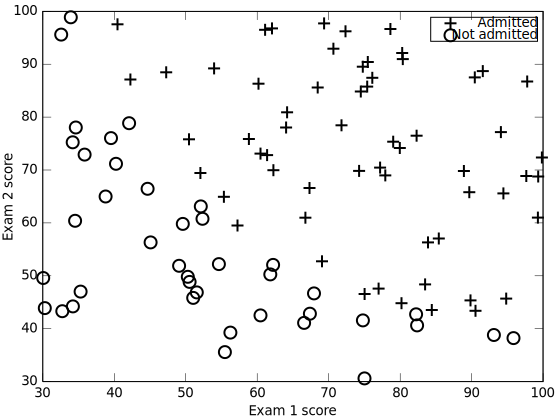

In [11]:
fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);
% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

## Compute Cost and Gradient
### Setup the data matrix appropriately, and add ones for the intercept term

In [12]:
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


### Use a built-in function (fminunc) to find the optimal parameters theta.

Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


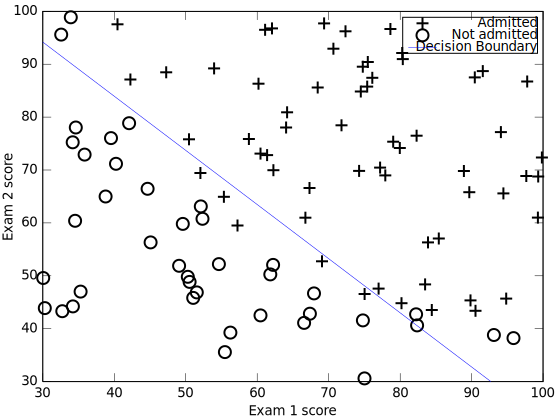

In [13]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

## Predict and Accuracies
After learning the parameters, you'll like to use it to predict the outcomes on unseen data. 
In this part, we will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and  score 85 on exam 2 will be admitted.
Furthermore, we will compute the training and test set accuracies of our model.

In [14]:
prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0
